In [28]:
pip install pydotplus

     |████████████████████████████████| 286kB 376kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=c4cd559b7b06394020bd0265a48b4d8bb793c09933c8b9572bc7734a14c3d2d2
  Stored in directory: /Users/jason13nn/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
conda install graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/jason13nn/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    conda-4.8.3                |           py37_0         2.8 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455 KB
    pixman-0.38.0              |       h1de35cc_0         341 KB
    ------------------------------------------------------------
                                           Total:        11.5

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus 
import statsmodels.api as sm
from random import sample 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz  # References: download link and instructions to install Graphviz.
from IPython.display import Image  # To plot decision tree.
from sklearn.externals.six import StringIO  # To plot decision tree.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings

# #8

In [23]:
#Read dataset from R
Carseats = sm.datasets.get_rdataset("Carseats","ISLR").data

In [35]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
# Transform qualitative variables into quantitative (dummy variable)
Carseats = pd.get_dummies(Carseats)

In [37]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


## (a)

In [25]:
# Split data into training and test set
X = Carseats.drop(columns=['Sales'])
y = Carseats['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

## (b)

In [26]:
# Fit regression tree
rgr = DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') 

rgr.fit(X_train, y_train)

warnings.filterwarnings('ignore') #hide warnings

In [27]:
# This function creates images of tree models using pydot
# Source: http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%208.ipynb
# The original code used pydot instead of pydotplus. We didn't change anything else.
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)


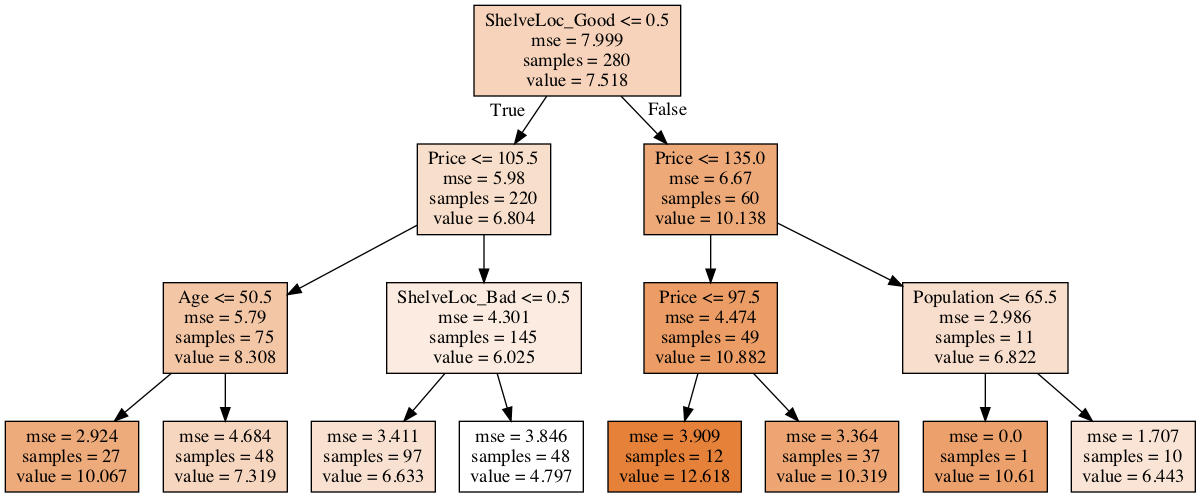

In [28]:
# Plot the tree
graph = print_tree(rgr, features=list(X_train.columns.values))
Image(graph.create_png())

From the plot we can see that **ShelveLoc** is the most significant factor to Sales. **Price** is the second most important factor in determining Sales. The same analysis logic applies for the remaining branches of the regression tree.

## (c)

In [30]:
# Build a regressor
rgr = DecisionTreeRegressor(random_state=1)
# Grid of parameters to hypertune
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
# Run grid search
grid_search = GridSearchCV(rgr, 
                           param_grid=param_grid, 
                           cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best'),
       iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=1e-07,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid=True, n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [31]:
# Find the best estimator
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [32]:
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=1e-07, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

The best value for max_depth using cross-validation is 5.

## (d)

In [38]:
# Fit bagging regressor
rgr = BaggingRegressor()
rgr.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [39]:
# Test MSE
print('Test MSE:', mean_squared_error(y_test, rgr.predict(X_test)))

Test MSE: 3.2151035833333332


## (e)

In [43]:
# Fit random forest regressor
rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
# Test MSE
print('Test MSE:', mean_squared_error(y_test, rgr.predict(X_test)))

Test MSE: 2.9796088166666674


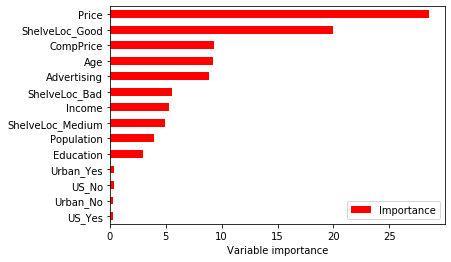

In [46]:
# Variable importance
importance = pd.DataFrame({'Importance':rgr.feature_importances_*100}, index=X_train.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')

# #9

In [124]:
#Read dataset from R
OJ = sm.datasets.get_rdataset("OJ","ISLR").data

In [70]:
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [125]:
# Transform qualitative variables into quantitative (dummy variable)
OJ.Store7 = pd.get_dummies(OJ.Store7)

In [126]:
OJ.Purchase = np.where(OJ.Purchase == "MM", 0, 1)

In [96]:
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,1,0.000000,0.000000,0.24,1
1,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,1,0.150754,0.000000,0.24,1
2,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,1,0.000000,0.091398,0.23,1
3,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,1,0.000000,0.000000,0.00,1
4,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0,0.000000,0.000000,0.00,0


## (a)

In [73]:
len(OJ)

1070

In [74]:
a = 800/1070
1-a

0.25233644859813087

In [170]:
# Split data into training and test set (training set require 800 observations)
X = OJ.iloc[:,1:]
y = OJ['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2523, random_state=1)

## (b)

In [171]:
# Fit regression tree
rgr = DecisionTreeRegressor(max_depth=3) 

rgr.fit(X_train, y_train)

warnings.filterwarnings('ignore') #hide warnings

## (c)

**LoyalCH** is the most important factor in determining **Purchase**.

## (d)

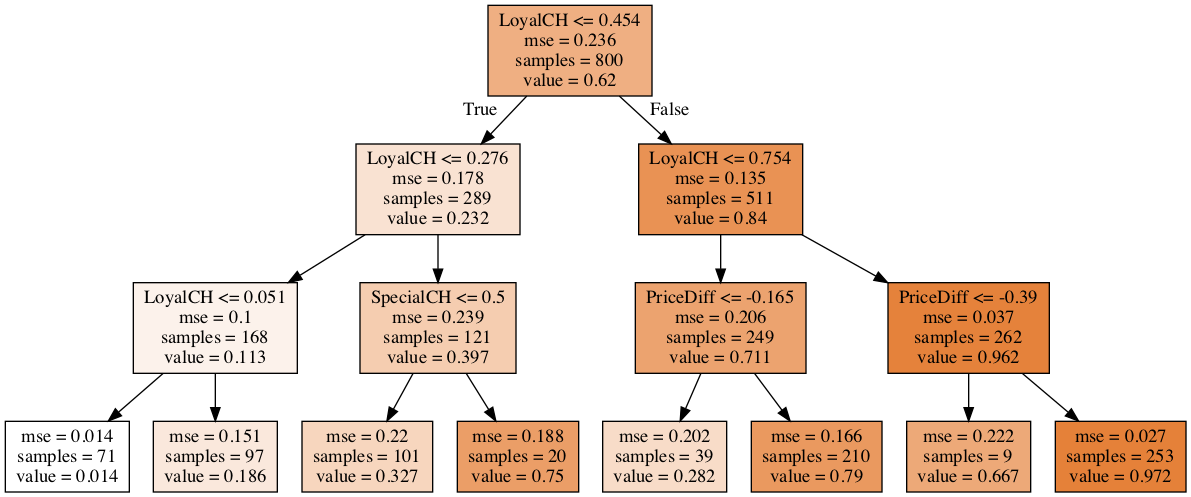

In [172]:
# Plot the tree
graph = print_tree(rgr, features=list(X_train.columns.values))
Image(graph.create_png())

According to the tree, **LoyalCH** is the most important factor in determining **Purchase**. A betther **LoyalCH** is more (value = 0.84) than **LoyalCH** in bad or medium **LoyalCH**(value = 0.232). The same analysis logic applies for the remaining branches of the regression tree.

## (e)

In [198]:
from sklearn.tree import DecisionTreeClassifier

#predict
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)  
y_pred = dtree.predict(X_test)

In [199]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 74,  39],
       [ 27, 130]])

## (f)

In [158]:
len(rgr_pred)

270

## (g)

In [ ]:
# Plot the results
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion=’gini’, max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion=’entropy’, max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({‘acc_gini’:pd.Series(acc_gini), 
 ‘acc_entropy’:pd.Series(acc_entropy),
 ‘max_depth’:pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot(‘max_depth’,’acc_gini’, data=d, label=’gini’)
plt.plot(‘max_depth’,’acc_entropy’, data=d, label=’entropy’)
plt.xlabel(‘max_depth’)
plt.ylabel(‘accuracy’)
plt.legend()

## (h)

Three.

## (i)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## (j)

The unpruned trees have higher training error rates.

## (k)

The unpruned trees have higher test error rates.

# #10

In [101]:
#Read dataset from R
Hitters = sm.datasets.get_rdataset("Hitters","ISLR").data

In [108]:
Hitters = pd.get_dummies(Hitters)

In [109]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,6.163315,0,1,0,1,0,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,6.173786,1,0,0,1,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,6.214608,0,1,1,0,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,...,805,40,4,4.516339,0,1,1,0,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,6.620073,1,0,0,1,1,0


## (a)

In [110]:
#Remove unknown salary
Hitters = Hitters.dropna(subset=['Salary'])

In [111]:
#log-transform the salaries
Hitters.Salary = np.log(Hitters.Salary)

## (b)

In [112]:
# Split data into training and test set
X = Hitters.drop(columns=['Salary'])
y = Hitters['Salary']

#first 200 observations to training set
#remaining to test set
X_train = X.ix[:200,:]
y_train = y.ix[:200]
X_test = X.ix[200:,:]
y_test = y.ix[200:]

## (c)

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

# Boosting with different shrinkage values
shrinkage_values = [.001, .025, .005, .01, .025, .05, .1, .25, .5]
mses = []
for i in shrinkage_values:
    bst = GradientBoostingRegressor(learning_rate=i, n_estimators=1000, random_state=1)
    bst.fit(X_train, y_train)
    mses.append(mean_squared_error(y_train, bst.predict(X_train)))

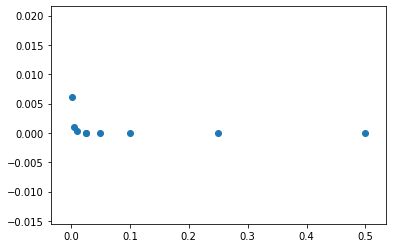

In [114]:
# Plot training set MSE for different shrinkage values
plt.scatter(shrinkage_values, mses)

## (d)

In [115]:
# Boosting with different shrinkage values
shrinkage_values = [.001, .025, .005, .01, .025, .05, .1, .25, .5]
mses = []
for i in shrinkage_values:
    bst = GradientBoostingRegressor(learning_rate=i, n_estimators=1000, random_state=1)
    bst.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, bst.predict(X_test)))

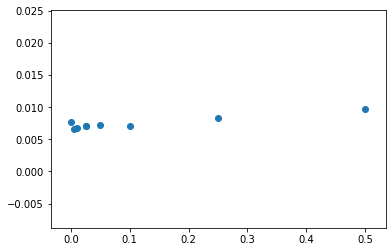

In [116]:
# Plot training set MSE for different shrinkage values
plt.scatter(shrinkage_values, mses)

In [117]:
# Get minimum test MSE value
print('Minimum test MSE:', np.min(mses))

Minimum test MSE: 0.006572324542503181


## (e)

In [118]:
from sklearn.linear_model import LinearRegression

# Linear regression
rgr = LinearRegression()
rgr.fit(X_train, y_train)

print('Minimum test MSE:', mean_squared_error(y_test, rgr.predict(X_test)))

Minimum test MSE: 0.01496996216931832


In [119]:
from sklearn.linear_model import LassoCV

# Cross-validated lasso
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

print('Minimum test MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Minimum test MSE: 0.014918365289124609


The test MSE obtained using boosting is lower than the test MSE obtained using a linear regression or a lasso regularized regression. This means that, according to this error metric, boosting is the model with better predictive capacity.

## (f)

Text(0.5, 0, 'Variable importance')

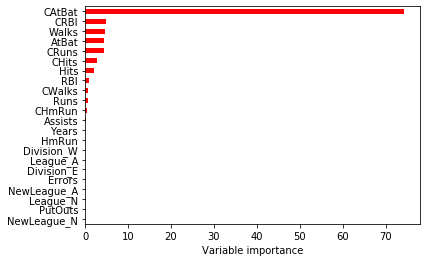

In [120]:
# Plot features importance to understand their importance.
bst = GradientBoostingRegressor(learning_rate=0.005)  # 0.005 is the learning_rate corresponding to the best test MSE
bst.fit(X_train, y_train)

feature_importance = bst.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r')
plt.xlabel('Variable importance')

## (g)

In [121]:
# Fit bagging regressor
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [122]:
# Test MSE
print('Test MSE:', mean_squared_error(y_test, bagging.predict(X_test)))

Test MSE: 0.006649532712226614
